# Policy Iteration

This file contains the code for control problem. Policy Iteration (PI) algorithm is implemented to calculate optimal policy 

    - There are two versions of policy iteration algorithms: "policy_iteration" and "policy_iteration_viz"

        - policy_iteration implements policy iteration algorithm and it returns optimal policy for the given MDP

        - policy_iteration_viz implements policy iteration algorithm; it stores the values at each iteration allowing the visualization and analysis 
        
## MDP.py contains the following:

    - Model for GridMDP  (GridMDP class)

        - Implements the Grid MDP model in AIMA4e Fig. 16.1

    - Functions for

        - Evaluation of utilities of states for a given policy

        - Calculation of Q value of a state-action pair for a given set of utilities
        
        - Extraction of policy for a given set of utilities

## Visualization.py contains the following functions:

    - Function to produce the animation of GridMDP for iterative algorithms with utilities and policies ovelayed on the grid 

    - Function to produce the plot of GridMDP with utilities and policies ovelayed on the grid 
    

In [1]:
# For Google Colab
# Upload the folder containing this file to google drive.
# Make sure that uninformed_informed_search.py is also in the same folder in google drive.
import sys, os

# Checking if the notebook is opened in google colab
#If YES, mount the google drive and change the directory
if 'google.colab' in sys.modules:

    # mount google drive
    from google.colab import drive
    drive.mount('/content/drive')

    # change path to the folder
    path = '/content/drive/My Drive/IT5005/MDP'
    print(path)
    #os.chdir changes the current working directory
    os.chdir(path)
    !pwd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl
mpl.rcParams['animation.writer'] = 'ffmpeg'
from MDP import *
from Visualization import *


# Grid MDP modelling

GridMDP implements the system described in Section 16.1 of AIMA4e.

class GridMDP:

 - rows = 3
       
       indicate the number of rows of the grid
       
- columns = 4
       
       indicate the number of columns of the grid

- state is defined as (i,j) where i is the column and j is row, with indexing starts from 1.Index of bottom row is 1 and index of left most column is 1.

       Example:  (2,3) indicates the cell in second row and third column

 - terminal_states={(4, 3): 1, (4, 2): -1} 
    
        (4,3) and (4,2) are terminal states. If the agent enters state (4,3), it collects a reward of 1. If the agent enters state (4,2), it collects a reward of -1. 

 - prob_intended = 0.8
    
        prob_intended is the probability of moving in intended direction

 - prob_perpendicular = 0.8
    
        prob_intended is the probability of moving perpendicular to the intended direction

 - default_reward
        
        indicates the reward for entering non-terminal states

- gamma

       indicates the discount

In [3]:
#Define model with default parameters
mdp = GridMDP()
state = (3,3)   
print(f"Transition Probabilities for the state {state}:")
print(mdp.transition_probabilities[state])
print(f"Rewards for the state {state}:")
print(mdp.rewards[state])
state = (4,3)  #(4,2)
print(f"Transition Probabilities for the state {state}:")
print(mdp.transition_probabilities[state])
print(f"Rewards for the state {state}:")
print(mdp.rewards[state])

Transition Probabilities for the state (3, 3):
{'U': [((3, 3), 0.8), ((2, 3), 0.1), ((4, 3), 0.1)], 'D': [((3, 2), 0.8), ((2, 3), 0.1), ((4, 3), 0.1)], 'L': [((2, 3), 0.8), ((3, 3), 0.1), ((3, 2), 0.1)], 'R': [((4, 3), 0.8), ((3, 3), 0.1), ((3, 2), 0.1)]}
Rewards for the state (3, 3):
{'U': {(3, 3): -0.04, (2, 3): -0.04, (4, 3): 1}, 'D': {(3, 2): -0.04, (2, 3): -0.04, (4, 3): 1}, 'L': {(2, 3): -0.04, (3, 3): -0.04, (3, 2): -0.04}, 'R': {(4, 3): 1, (3, 3): -0.04, (3, 2): -0.04}}
Transition Probabilities for the state (4, 3):
{'U': [((4, 3), 1.0)], 'D': [((4, 3), 1.0)], 'L': [((4, 3), 1.0)], 'R': [((4, 3), 1.0)]}
Rewards for the state (4, 3):
{'U': {(4, 3): 0}, 'D': {(4, 3): 0}, 'L': {(4, 3): 0}, 'R': {(4, 3): 0}}


# Q-value Calculation:

The Q-value is calculated as:

$$ Q(s, a) = \sum_{s'} P(s'|s,a) \left[ R(s,a,s') + \gamma \cdot U[s'] \right] $$

The above equation is also known as Bellman equation.

# Policy Evaluation (policy_evaluation)

This function evaluates the utilities of states $U^{\pi}(s)\; \forall s$, given the policy $\pi$

It uses iterative method to solve the following system of linear equations

$$U^{\pi}(s) = \sum_{s'} P(s'|\pi(s),s') [R(s, \pi(s), s')+ \gamma U^{\pi}(s)]$$

where $P(s'|\pi(s),s')$, $R(s, \pi(s), s')$ and $\gamma$ are constants for a given MDP and policy.

# Policy Improvement 

This function improves (extracts) the policy based on the utilties of the states



In [4]:
def policy_iteration(mdp, theta=0.001):
    #Initialize the utilities of states to 0
    U = {state: 0 for state in mdp.states}
    # Start with a random policy
    policy = {state: np.random.choice(mdp.actions) for state in mdp.states if state not in mdp.terminal_states}
    print(f"Initial Policy: {policy}")
    i = 0        
    while True:        
        i += 1
        print("Policy Evaluation...")
        U = policy_evaluation(mdp, policy, theta)
        print(f"Utilities: {U}")        
        print("Policy Improvement...")
        new_policy = extract_policy(mdp, U) 
        print(f"New Policy at iteration - {i+1}: {new_policy}")
        # Terminate the search if there is no change in the policy
        if new_policy == policy:        
            break
        policy = new_policy
    return U, policy

Initial Policy: {(1, 1): 'D', (2, 1): 'U', (3, 1): 'L', (4, 1): 'L', (1, 2): 'R', (3, 2): 'D', (1, 3): 'U', (2, 3): 'L', (3, 3): 'U'}
Policy Evaluation...
Utilities: {(1, 1): -3.75833637986002, (2, 1): -3.741905140175556, (3, 1): -3.7073318669434867, (4, 1): -3.4090095792533246, (1, 2): -3.8340475026474783, (3, 2): -3.409009579253325, (4, 2): 0, (1, 3): -3.9019501806552386, (2, 3): -3.9019501806552386, (3, 3): -1.5471289364814653, (4, 3): 0}
Policy Improvement...
New Policy at iteration - 2: {(1, 1): 'R', (2, 1): 'R', (3, 1): 'R', (4, 1): 'U', (1, 2): 'D', (3, 2): 'R', (1, 3): 'D', (2, 3): 'R', (3, 3): 'R'}
Policy Evaluation...
Utilities: {(1, 1): -1.100993531680923, (2, 1): -1.0599341642867597, (3, 1): -1.0228140914520092, (4, 1): -1.0091658886368364, (1, 2): -1.137000364766972, (3, 2): -0.8312777452802478, (4, 2): 0, (1, 3): -0.9635752714679179, (2, 3): 0.7279876516498878, (3, 3): 0.787684282832157, (4, 3): 0}
Policy Improvement...
New Policy at iteration - 3: {(1, 1): 'R', (2, 1): '

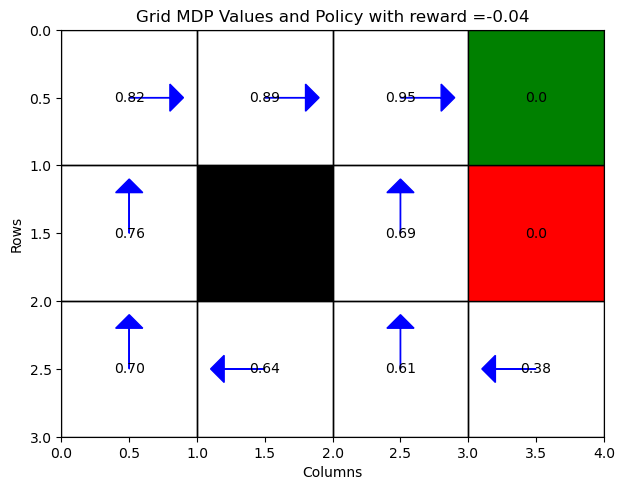

In [5]:
# Example usage of value iteration
mdp = GridMDP(default_reward=-0.04,gamma = 0.99)
# Perform policy iteration to find the optimal value function and policy
U, policy = policy_iteration(mdp)
plot_policy_with_utilities(mdp, U, policy)

In [6]:
def policy_iteration_viz(mdp, theta=0.001):
    #Initialize the utilities of states to 0
    U = {state: 0 for state in mdp.states}
    # Start with a random policy
    policy = {state: np.random.choice(mdp.actions) for state in mdp.states if state not in mdp.terminal_states}
    print(f"Initial Policy: {policy}")
    #all_U and all_policy are only for visualization
    all_U = []  # List to store values at each iteration
    all_policy = []  # List to store policy at each iteration
    i = 0
    while True:
        print(i+1)
        i = i+1        
        all_policy.append(policy.copy())
        print("Policy Evaluation...")
        U = policy_evaluation(mdp, policy, theta)
        print(f"Utilities: {U}")
        all_U.append(U.copy())
        print("Policy Improvement...")
        new_policy = extract_policy(mdp, U) 
        print(f"New Policy at iteration - {i+1}: {new_policy}")
        # Terminate the search if there is no change in the policy
        if new_policy == policy:
            all_policy.append(policy.copy())
            break
        policy = new_policy
    return all_U, all_policy

Initial Policy: {(1, 1): 'R', (2, 1): 'L', (3, 1): 'R', (4, 1): 'U', (1, 2): 'D', (3, 2): 'D', (1, 3): 'R', (2, 3): 'D', (3, 3): 'L'}
1
Policy Evaluation...
Utilities: {(1, 1): -0.09418502629969601, (2, 1): -0.09418502629969601, (3, 1): -0.8537580523242236, (4, 1): -0.9657562907915346, (1, 2): -0.09418502629969601, (3, 2): -0.7952810955630455, (4, 2): 0, (1, 3): -0.12815063795130305, (2, 3): -0.13743674167336523, (3, 3): -0.19756081034122164, (4, 3): 0}
Policy Improvement...
New Policy at iteration - 2: {(1, 1): 'D', (2, 1): 'L', (3, 1): 'L', (4, 1): 'L', (1, 2): 'D', (3, 2): 'U', (1, 3): 'D', (2, 3): 'L', (3, 3): 'R'}
2
Policy Evaluation...
Utilities: {(1, 1): -0.0911370618803475, (2, 1): -0.09113706188034751, (3, 1): -0.020637834022313273, (4, 1): -0.1353395153736945, (1, 2): -0.09113706188034751, (3, 2): 0.6227826542270934, (4, 2): 0, (1, 3): -0.09113706188034751, (2, 3): -0.09113706188034751, (3, 3): 0.9385169657931849, (4, 3): 0}
Policy Improvement...
New Policy at iteration - 3: 

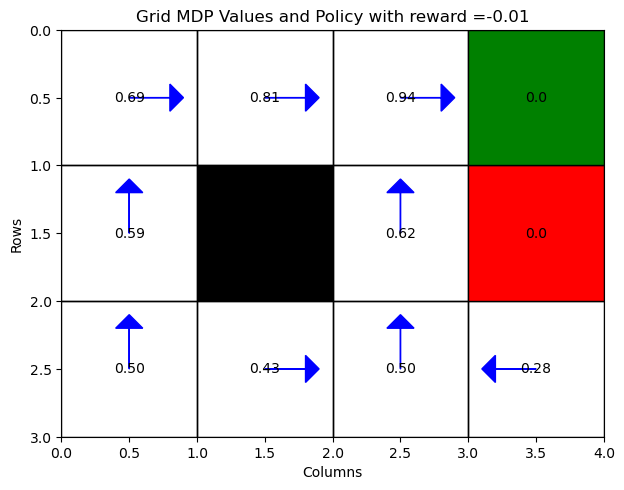

In [7]:
# Example usage of policy iteration
mdp_ = GridMDP(default_reward=-0.01,gamma = 0.9)
# Perform policy iteration to find the optimal value function and policy
all_U, all_policy = policy_iteration_viz(mdp_)
plot_policy_with_utilities(mdp_, all_U[-1], all_policy[-1])


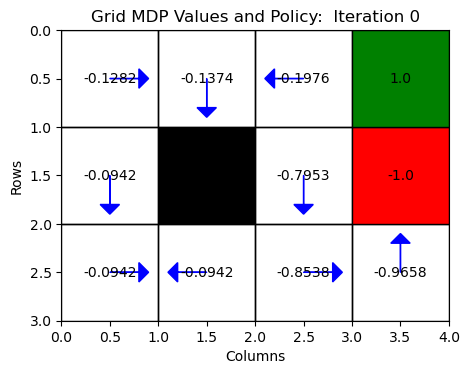

In [8]:
# Plot the animation of the policy iteration process with policy overlay
plot_animation = animation_policy_with_utilities(mdp_, all_U, all_policy, pause_time=1)


# Deterministic MDP 

Each action costs 1 unit, i.e., reward = -1

Only one terminal state with reward of -1 for transition to terminal state

All actions are deterministic

 - prob_intended=1

 - prob_perpendicular=0

Discount factor of 1

 - gamma = 1
 

Initial Policy: {(1, 1): 'L', (2, 1): 'R', (3, 1): 'D', (4, 1): 'L', (1, 2): 'U', (3, 2): 'L', (4, 2): 'D', (1, 3): 'U', (2, 3): 'U', (3, 3): 'D'}
1
Policy Evaluation...
Utilities: {(1, 1): -9.991404955442832, (2, 1): -9.991404955442832, (3, 1): -9.991404955442832, (4, 1): -9.991404955442832, (1, 2): -9.991404955442832, (3, 2): -9.991404955442832, (4, 2): -9.991404955442832, (1, 3): -9.991404955442832, (2, 3): -9.991404955442832, (3, 3): -9.991404955442832, (4, 3): 0}
Policy Improvement...
New Policy at iteration - 2: {(1, 1): 'U', (2, 1): 'U', (3, 1): 'U', (4, 1): 'U', (1, 2): 'U', (3, 2): 'U', (4, 2): 'U', (1, 3): 'U', (2, 3): 'U', (3, 3): 'R'}
2
Policy Evaluation...
Utilities: {(1, 1): -9.991404955442832, (2, 1): -9.991404955442832, (3, 1): -2.71, (4, 1): -1.9, (1, 2): -9.991404955442832, (3, 2): -1.9, (4, 2): -1.0, (1, 3): -9.991404955442832, (2, 3): -9.991404955442832, (3, 3): -1.0, (4, 3): 0}
Policy Improvement...
New Policy at iteration - 3: {(1, 1): 'U', (2, 1): 'R', (3, 1): 'U

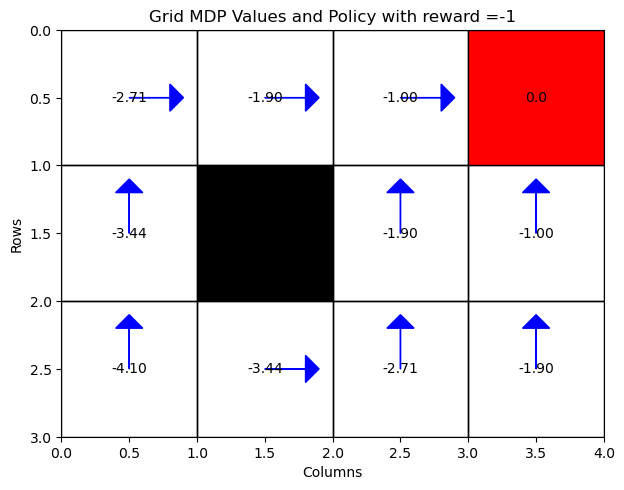

In [11]:
deterministic_mdp = GridMDP(default_reward=-1, terminal_states={(4, 3): -1},prob_intended=1, prob_perpendicular=0, gamma = 0.9)
# Perform value iteration to find the optimal value function and policy
all_U, all_policy = policy_iteration_viz(deterministic_mdp)
plot_policy_with_utilities(deterministic_mdp, all_U[-1], all_policy[-1])

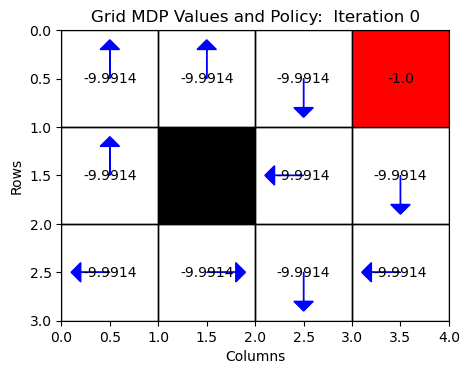

In [12]:
# Plot the animation of the policy iteration process with policy overlay
plot_animation = animation_policy_with_utilities(deterministic_mdp, all_U, all_policy, pause_time=1)
